In [1]:
############################################################

include( "jade_base.jl" )
using .jade
using LaTeXStrings
using NPZ
using Plots


tlim = 10000.0 yr.
Initializing integration kernels... Done.
Solving initial dust sizes... Done.
6, dt = 5.4802128284227295e10, t = 3.288127697053638e11
Ends at t = 3.288127697053638e11


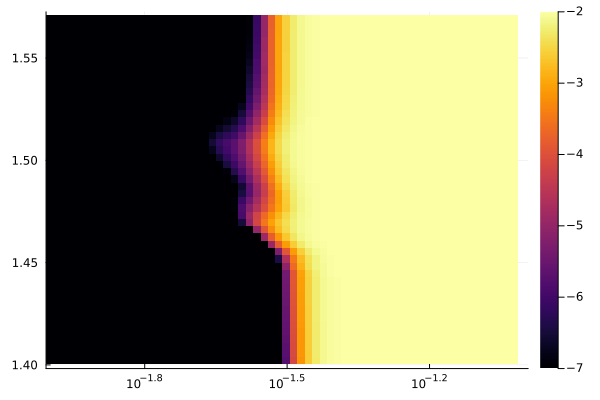

In [11]:
############################################################
# Example for calculations
##############################

ppd = jade.ppd_t(  );
ppd.calc_coag = true;
ppd.f_sub_raw = jade.gen_sublimation_interp(
#     "Graphene_sublimation.csv" );
    "MgFeSiO4_sublimation.csv" );    
#     "MgSiO3_sublimation.csv" );

r_min_au = 0.01
r_max_au = 0.1
vr0      = 1e-1;
vr_floor = 1e-1;
tlim     = r_max_au * jade.AU / vr0 * 10;
tlim     = min( tlim, 1e4 * jade.yr );
println( "tlim = ", tlim / jade.yr, " yr." );

jade.f_init!( ppd, n_mbin = 20,
              r_min_au = r_min_au, 
              r_max_au = r_max_au,
              n_r = 64, n_th = 48, th_min = 1.4,
              v0 = vr0, v_floor = vr_floor )
jade.f_intg_ray!( ppd );

jade.f_intg_dust!( ppd, 1e1 * tlim )
jade.f_major_loop!( ppd, nlim = 200, tlim = tlim,
                    n_osd = 10, dt0 = tlim )

r, th, rho_m = jade.f_get_heatmap_stat!( ppd, jade.f_rho_m )
r, th, rho_g = jade.f_get_heatmap_stat!( ppd, jade.f_rho_g )
heatmap( r, th, transpose( log10.(
    abs.( rho_m ./ rho_g ) .+ 1e-15 ) ),
              xscale = :log10, clim = ( -7, -2 ) )

############################################################

In [12]:
############################################################
# Extract data and save for Python
##############################

r_f, th_f, d_g_ratio = jade.f_get_heatmap_stat!(
                       ppd, jade.f_dust_mass_ratio! );
_, _, rho_g      = jade.f_get_heatmap_stat!( ppd,
                                             jade.f_rho_g );
_, _, rho_m_tot  = jade.f_get_heatmap_stat!( ppd,
                                             jade.f_rho_m );
_, _, T_res      = jade.f_get_heatmap_stat!( ppd,
                                             jade.f_T     );
r_c, th_c, rho_m = jade.f_extract_rho_m!(    ppd );

npzwrite( "adv/MgFeSiO4/data_no_acc.npz", Dict(
    "r_f" => r_f, "th_f" => th_f, "d_g_ratio" => d_g_ratio,
    "r_c" => r_c, "th_c" => th_c, "rho_m" => rho_m,
    "T" => T_res, "rho_m_tot" => rho_m_tot, "dx" => ppd.dx,
    "m_arr" => ppd.cdat.m_arr, "a_arr" => ppd.cdat.a_arr
) );

############################################################

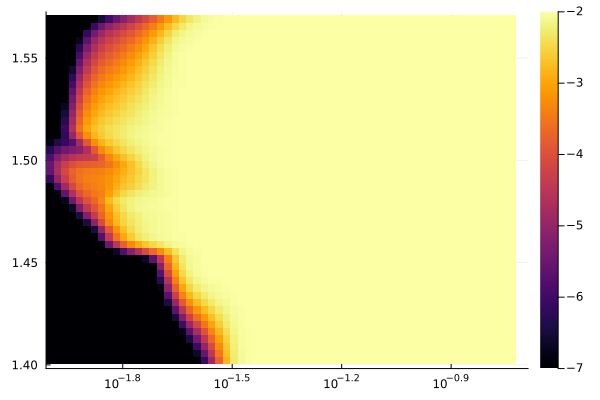

In [3]:

r, th, rho_m = jade.f_get_heatmap_stat!( ppd, jade.f_rho_m )
r, th, rho_g = jade.f_get_heatmap_stat!( ppd, jade.f_rho_g )
heatmap( r, th, transpose( log10.(
    abs.( rho_m ./ rho_g ) .+ 1e-15 ) ),
              xscale = :log10, clim = ( -7, -2 ) )


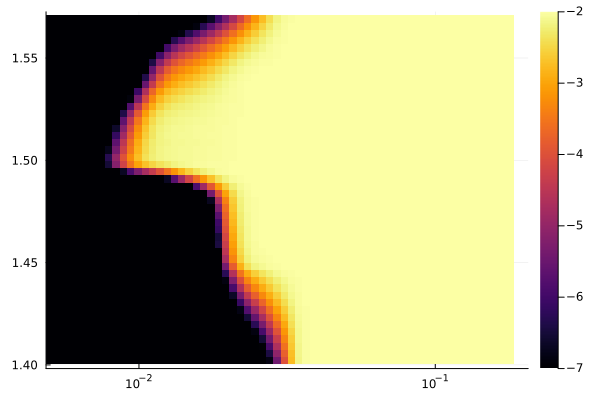

In [32]:

r, th, rho_m = jade.f_get_heatmap_stat!( ppd, jade.f_rho_m )
r, th, rho_g = jade.f_get_heatmap_stat!( ppd, jade.f_rho_g )
jade.heatmap( r, th, transpose( log10.(
    abs.( rho_m ./ rho_g ) .+ 1e-15 ) ),
              xscale = :log10, clim = ( -7, -2 ) )


tlim = [ 94.87442922374429,  94.87442922374429 ] yr.
Initializing integration kernels... Done.


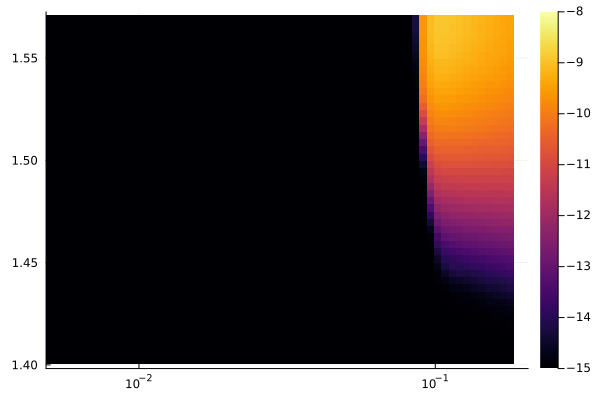

In [8]:

ppd = jade.ppd_t(  );
ppd.calc_coag = true;
ppd.f_sub_raw = jade.gen_sublimation_interp(
#     "Graphene_sublimation.csv" );
#     "MgFeSiO4_sublimation.csv" );    
    "MgSiO3_sublimation.csv" );

r_max_au = 0.2
vr0      = 1e4;
vr_floor = 1e-1;
tlim0    = r_max_au * jade.AU / vr0 * 10;
tlim     = min( tlim0, 1e4 * jade.yr );
println( "tlim = [ ", tlim0 / jade.yr, ",  ",
         tlim / jade.yr, " ] yr." );

jade.f_init!( ppd, n_mbin = 20, r_min_au = 0.005, 
              r_max_au = r_max_au,
              n_r = 64, n_th = 48, th_min = 1.4,
              v0 = vr0, v_floor = vr_floor, a_min = 1e-5, a_max = 1e1 )
jade.f_intg_ray!( ppd );
jade.f_intg_dust!( ppd, tlim )


r, th, res = jade.f_get_heatmap_stat!(
    ppd, jade.f_rho_m );
jade.heatmap( r, th, transpose( log10.( res .+ 1e-15 ) ),
         xscale = :log10, clim = ( -15, -8 ) )


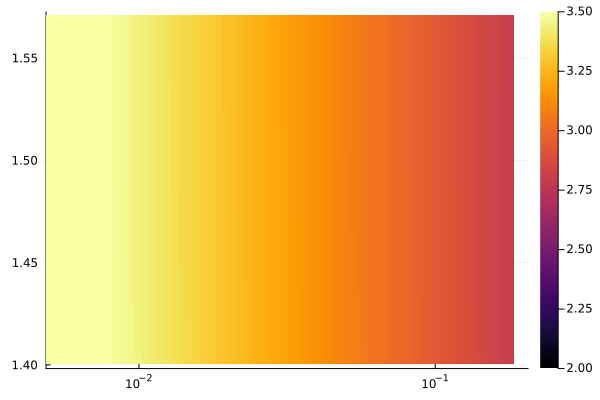

In [15]:
############################################################
# Export data for heatmap plots and other purposes
##############################

r, th, res = jade.f_get_heatmap_stat!(
    ppd, jade.f_T );
jade.heatmap( r, th, transpose( log10.( res .+ 1e-15 ) ),
         xscale = :log10, clim = ( 2, 3.5 ) )

############################################################

In [14]:

r, th, res = jade.f_get_heatmap_stat!( ppd,
                                       jade.f_dust_mass_ratio );
fsize = 14
jade.heatmap( r, pi / 2 .- reverse( th, dims = 1 ), 
         reverse( transpose( log10.( res .+ 1e-15 ) ), dims = 1 ),
         # xscale = :log10,
         clim = ( -7, -2 ),  seriescolor=:turbo,
         xtickfontsize = fsize, xlabelfontsize = fsize,
         ytickfontsize = fsize, ylabelfontsize = fsize,
         xlabel=L"$r/\mathrm{AU}$", ylabel=L"$\pi/2-\theta$", 
         colorbar_title = L"$\log_{10}(m_\mathrm{dust}/m_\mathrm{gas})$",
         colorbar_titlefontsize = fsize )


LoadError: LoadError: UndefVarError: `@L_str` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name also exists in LaTeXStrings.
in expression starting at In[14]:11

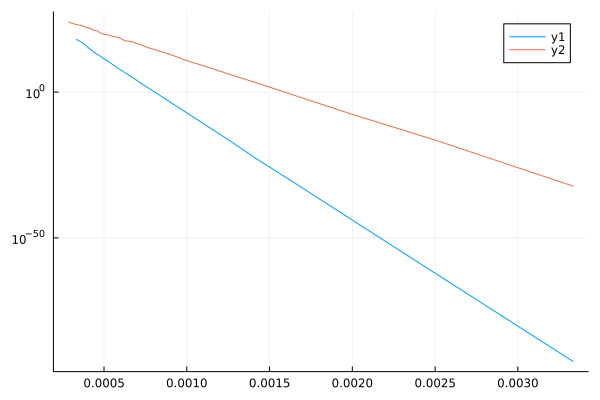

In [13]:
############################################################
# Verifications for the sublimation files
##############################

data = readdlm( "MgFeSiO4_sublimation.csv", ',',
                comments = true, comment_char = '#' )
plot( 1 ./ data[ :, 2 ], data[ :, 3 ], yaxis = :log10 )
data = readdlm( "MgSiO3_sublimation.csv", ',',
                comments = true,  comment_char = '#' )
plot!( 1 ./ data[ :, 2 ], data[ :, 3 ], yaxis = :log10 )
############################################################

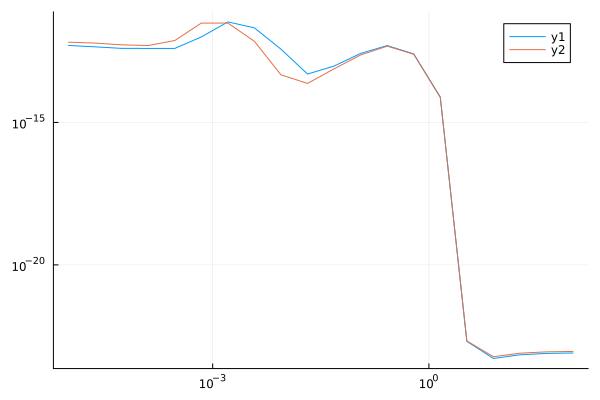

In [14]:
############################################################
# Example plot for dust size distributions somewhere
##############################

loc = ppd.data[ 27, 24 ]
plot( ppd.cdat.a_arr, abs.( loc.rho_m ),
      yaxis =:log10, xaxis =:log10 )
loc = ppd.data[ 25, 24 ]
plot!( ppd.cdat.a_arr, abs.( loc.rho_m ),
       yaxis =:log10, xaxis =:log10 )
############################################################